## Sourcing & Analyzing Time-Series Data

### Table of Content

#### 1. Importing your libraries and data

#### 2. Subsetting and wrangling time-series data

#### 3. Time series analysis: decomposition

#### 4. Testing for stationarity

#### 5. Stationarizing the Resort Hotel Data

### 1. Importing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings

In [2]:
path = '/Users/henning/Portfolio/Hotel_Booking'

In [3]:
h1 = pd.read_csv(os.path.join(path, 'Data', 'H1.csv'))

In [4]:
h1.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,342,2015,July,27,1,0,0,2,0,...,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,0,737,2015,July,27,1,0,0,2,0,...,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,0,7,2015,July,27,1,0,1,1,0,...,No Deposit,NULL,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,0,13,2015,July,27,1,0,1,1,0,...,No Deposit,304,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,0,14,2015,July,27,1,0,2,2,0,...,No Deposit,240,NULL,0,Transient,98.0,0,1,Check-Out,2015-07-03


### 2. Subsetting and wrangling time-series data¶

In [5]:
# removing all data that is not needed for the time series analysis
h1 = h1[['ArrivalDateYear', 'ArrivalDateMonth', 'ArrivalDateDayOfMonth', 'ADR']]

In [6]:
h1.head()

,ArrivalDateYear,ArrivalDateMonth,ArrivalDateDayOfMonth,ADR
0,2015,July,1,0.0
1,2015,July,1,0.0
2,2015,July,1,75.0
3,2015,July,1,75.0
4,2015,July,1,98.0


In [7]:
# Convert the month names to datetime, and then extract the month number
h1['ArrivalDateMonth'] = pd.to_datetime(h1['ArrivalDateMonth'], format='%B').dt.month

In [8]:
h1.head()

,ArrivalDateYear,ArrivalDateMonth,ArrivalDateDayOfMonth,ADR
0,2015,7,1,0.0
1,2015,7,1,0.0
2,2015,7,1,75.0
3,2015,7,1,75.0
4,2015,7,1,98.0


In [9]:
h1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40060 entries, 0 to 40059
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ArrivalDateYear        40060 non-null  int64  
 1   ArrivalDateMonth       40060 non-null  int32  
 2   ArrivalDateDayOfMonth  40060 non-null  int64  
 3   ADR                    40060 non-null  float64
dtypes: float64(1), int32(1), int64(2)
memory usage: 1.1 MB


In [10]:
h1['ArrivalDateMonth'] = h1['ArrivalDateMonth'].astype(int)

In [11]:
# Convert the columns to strings and concatenate
h1['ArrivalDate'] = pd.to_datetime(h1['ArrivalDateYear'].astype(str) + '-' +
                                   h1['ArrivalDateMonth'].astype(str).str.zfill(2) + '-' +
                                   h1['ArrivalDateDayOfMonth'].astype(str).str.zfill(2))

In [12]:
h1.head()

,ArrivalDateYear,ArrivalDateMonth,ArrivalDateDayOfMonth,ADR,ArrivalDate
0,2015,7,1,0.0,2015-07-01
1,2015,7,1,0.0,2015-07-01
2,2015,7,1,75.0,2015-07-01
3,2015,7,1,75.0,2015-07-01
4,2015,7,1,98.0,2015-07-01


In [13]:
# removing the old datetime columns
h1 = h1.drop(columns=['ArrivalDateYear', 'ArrivalDateMonth', 'ArrivalDateDayOfMonth'])

In [14]:
h1.head()

,ADR,ArrivalDate
0,0.0,2015-07-01
1,0.0,2015-07-01
2,75.0,2015-07-01
3,75.0,2015-07-01
4,98.0,2015-07-01


In [15]:
# Group by 'ArrivalDate' and calculate the mean of 'ADR' for each group
h1 = h1.groupby('ArrivalDate')['ADR'].mean().reset_index()

In [16]:
h1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ArrivalDate  793 non-null    datetime64[ns]
 1   ADR          793 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.5 KB


In [17]:
h1.head()

,ArrivalDate,ADR
0,2015-07-01,90.293721
1,2015-07-02,101.975909
2,2015-07-03,106.468250
3,2015-07-04,101.784800
4,2015-07-05,105.960889


In [18]:
# Set the "Date" column as the index

from datetime import datetime

h1['datetime'] = pd.to_datetime(h1['ArrivalDate']) # Create a datetime column from "Date.""
h1 = h1.set_index('datetime') # Set the datetime as the index of the dataframe.
h1.drop(['ArrivalDate'], axis=1, inplace=True) # Drop the "ArrivalDate" column.
h1.head()

,ADR
datetime,
2015-07-01,90.293721
2015-07-02,101.975909
2015-07-03,106.468250
2015-07-04,101.784800
2015-07-05,105.960889


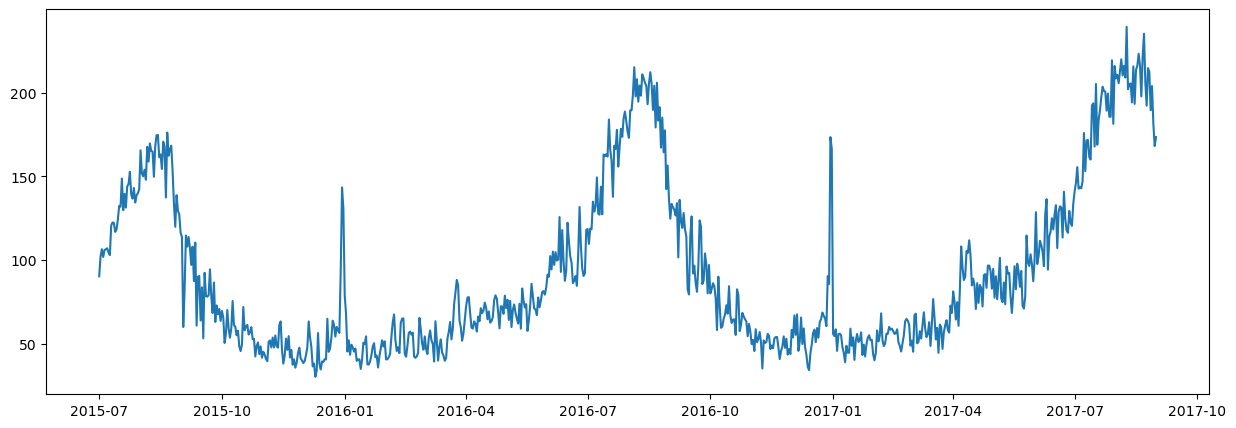

In [19]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(h1)

### 3. Time-series analysis: decomposition

In [20]:
# Decompose the time series

decomposition = sm.tsa.seasonal_decompose(h1, model='multiplicative')

In [21]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

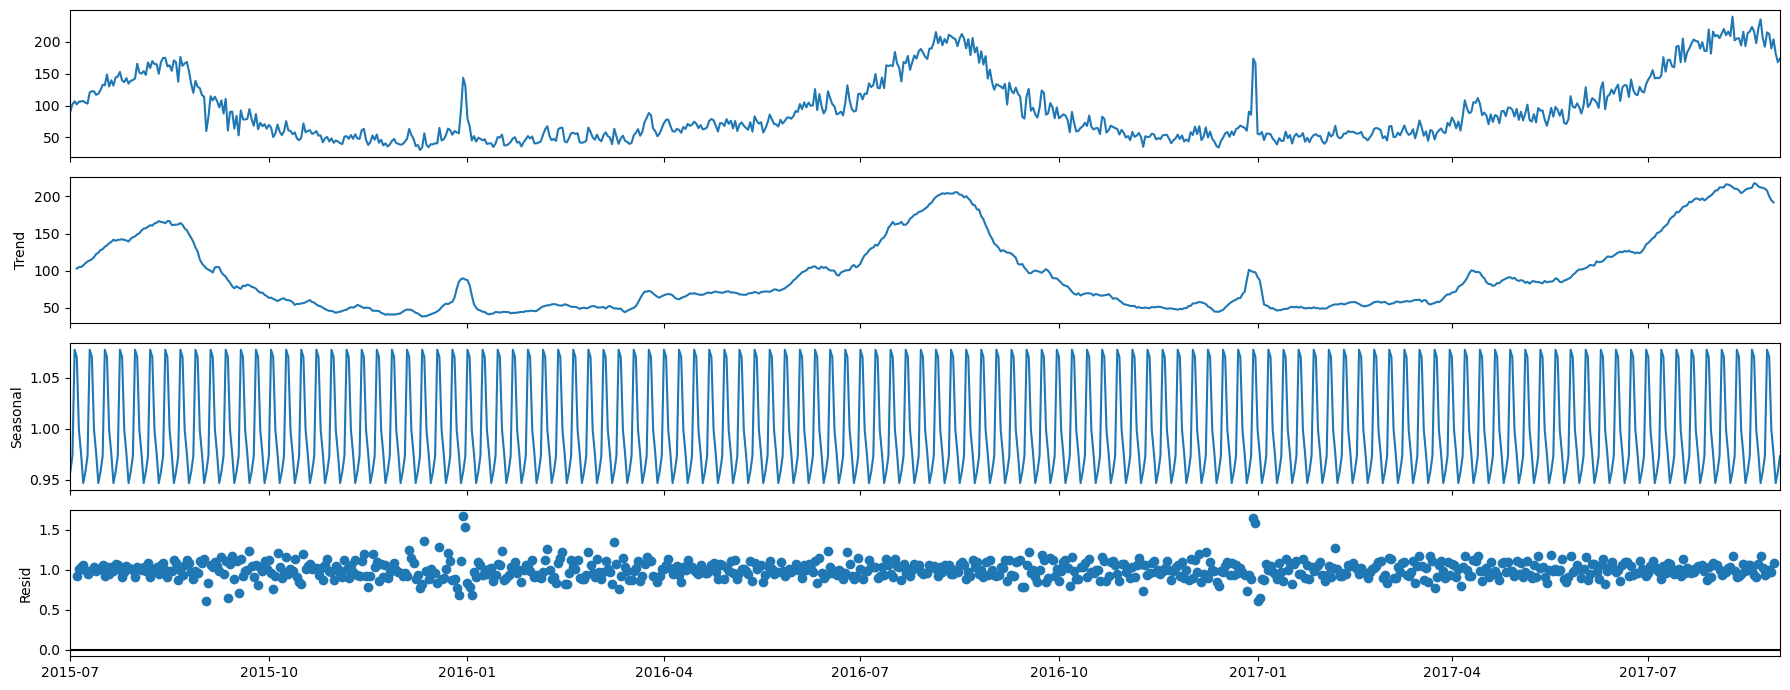

In [22]:
# Plot the separate components

decomposition.plot()
plt.show()